In [4]:
!pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
      --------------------------------------- 0.1/7.6 MB 3.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/7.6 MB 5.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.6 MB 8.3 MB/s eta 0:00:01
     ------------ --------------------------- 2.3/7.6 MB 13.6 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.1/7.6 MB 15.4 M

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [12]:
data = pd.read_csv("the_office_series.csv" , index_col = 0 )
data.head(15)


,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,19 April 2005,NaN,Greg Daniels,Greg Daniels
5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.80,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling
6,2,The Dundies,"Very much unlike his staff, an overeager Micha...",8.7,4315,9.00,21,20 September 2005,NaN,Greg Daniels,Mindy Kaling
7,2,Sexual Harassment,The office reviews its sexual harassment polic...,8.2,3665,7.13,22,27 September 2005,NaN,Ken Kwapis,B. J. Novak
8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.30,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur
9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.60,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak


In [9]:
data["scaled_ratings"] = (data["Ratings"] -data["Ratings"].min())/(data["Ratings"].max() -data["Ratings"].min())

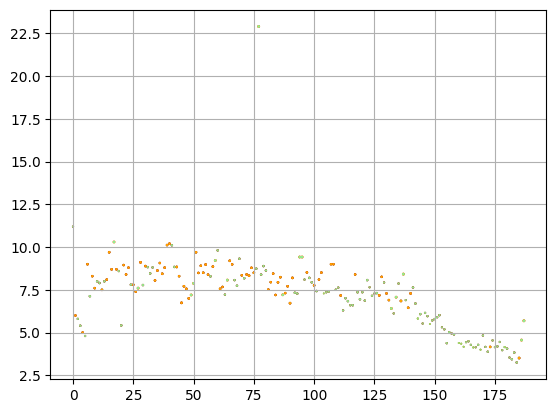

In [10]:

#plt.scatter(data.index, data["Viewership"], s= (data["Ratings"] >= 7.5), marker='^', c=c)

#s1 = data["Ratings"] >= 7.5   
s1 = np.ma.masked_where(data["scaled_ratings"] >= 0.75, data["scaled_ratings"])
s2 = np.ma.masked_where(data["scaled_ratings"] < 0.25, data["scaled_ratings"])
s3 = np.ma.masked_where(np.logical_and(data["scaled_ratings"] >= 0.25 , data["scaled_ratings"] < 0.50), data["scaled_ratings"])
s4 = np.ma.masked_where(np.logical_and(data["scaled_ratings"] >= 0.50 , data["scaled_ratings"] < 0.75), data["scaled_ratings"])

plt.scatter(data.index, data["Viewership"], s= s1, c="darkgreen")
plt.scatter(data.index, data["Viewership"], s= s2, c="red")
plt.scatter(data.index, data["Viewership"], s= s3, c="orange")
plt.scatter(data.index, data["Viewership"], s= s4, c="lightgreen")



#plt.plot(data.index, data["Viewership"])
plt.grid()
plt.show()
plt.rcParams['figure.figsize'] = [11,7]